# 1). Giriş
https://www.kaggle.com/nathaniel/uci-online-retail-ii-data-set linkindeki veri setini kullanarak;

Veri setini "Satış Verileri" ve "İade Verileri" olarak ayıracağım.
Satış verisini anlamlandırma ve veri ön işleme adımlarını uygulayacağım.
Satış veri setine RFM Analizi ile Müşteri Segmentasyonu işlemini gerçekleştirip, çıkan sonucu pazarlama stratejilerine yönelik aksiyon kararları açısından yorumlayacağım.
### Nedir Bu RFM? :

Recency, Frequency, Monetory kelimelerinin baş harflerinden oluşur.

Recency : Müşterinin son temasından bugüne kadar geçen süredir.
Frequency : Müşterinin toplam satın alma sayısıdır.
Monetary : Müşterinin yaptığı toplam harcamadır.
Bu değerlerin 1 ile 5 arasında puanlanarak müşterilerin gruplara ayrılması işlemine de "Müşteri Segmentasyonu" denir. Örnek segmentler aşağıdaki görselde sunulmuştur.
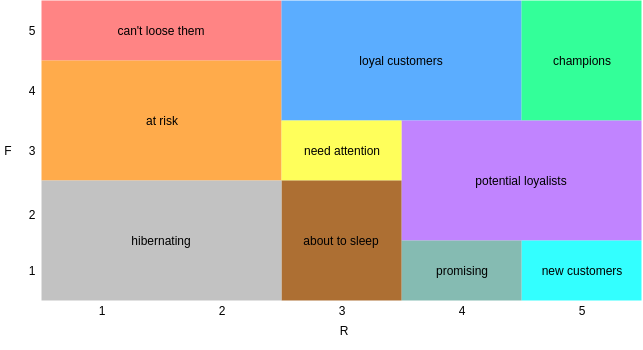

### Veri Seti Hakkında Genel Bilgiler :

"online_retail_II" isimli veri seti İngiltere merkezli online bir satış mağazasının 01/12/2009 - 09/12/2011 tarihleri arasındaki satışlarını içermektedir. Bu şirket hediyelik eşya satmaktadır. Promosyon ürünleri gibi düşünebilir. Müşterilerinin çoğu da toptancıdır.

Excelde 2 sheet bulunmaktadır. Ben RFM Analizi için "Year 2010-2011" olan 2. sheeti kullanacağım.

Sheet : Year 2009-2010
Sheet : Year 2010-2011

###Değişkenler:

InvoiceNo: Fatura numarası. Eşsiz bir değerdir. Eğer bu kod C ile başlıyorsa, iade anlamına gelir
StockCode: Ürün kodu. Her bir ürün için eşsiz numaradır
Description: Ürün ismi
Quantity: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir. C ile başlayanlarda negatif değer almaktadır
InvoiceDate: Fatura tarihi ve zamanı
UnitPrice: Ürün fiyatı (Sterlin cinsinden)
CustomerID: Müşteri numarası. Her bir müşteri için eşsiz numaradır
Country: Ülke ismi. Müşterinin yaşadığı ülkeyi ifade eder
Linkteki veri setini "+ Add data" butonu ile notebookuma dahil ettim.

# 2). Kütüphane Ayarları

In [29]:
#Warningleri çalışmamda görmek istemediğim için kapatıyorum.
import warnings
warnings.simplefilter(action='ignore')


import pandas as pd
#virgulden sonra gösterilecek olan sayı 2 basamak olarak ayarlanıyor.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Çıktılarda tüm satır ve sütunları görebilmek için kütüphane ayarı yapılıyor.
pd.set_option('display.max_columns', None); 
pd.set_option('display.max_rows', None);

# 3). Veri Okuma

In [30]:
#Excel okuma işlemini gerçekleştiriyorum. 2.Sheet olan "Year 2010-2011" üzerinden çalışmamı gerçekleştireceğim.
#"df" isimli Dataframe yapımı oluşturuyorum.

df_2010_2011 = pd.read_excel("../Veri_Bilimi_Uyg/online_retail_II.xlsx", sheet_name = "Year 2010-2011")
df = df_2010_2011.copy()

In [31]:
#İade faturalarım için df_iade isimli dataframe yapımı oluşturuyorum. "Invoice" kolonu "C" ile başlayanları bu dataframe'e atıyorum.
df_iade = df[df["Invoice"].str.startswith("C", na = False)]

In [32]:
#Orjinal dataframe yapımdan iadeleri çıkartarak, satış verilerini çekiyorum, df_satis olarak kaydediyorum.

df_satis = df[~(df["Invoice"].str.startswith("C", na = False))]

# 4). Veri Ön İşleme

In [33]:
# Satış veri setinde NaN kontrolü yapıyorum. Değişken bazında NaN olan sayılara bakacağım.
# "Description" için 1454 değerin, "Customer ID" için 134697 değerin NaN olduğunu gözlemledim.
df_satis.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    134697
Country             0
dtype: int64

In [37]:
#Customer ID değerleri NaN olanlar, RFM Analizinde işime yaramayacağı için uçuruyorum.
df_satis.dropna(subset=['Customer ID'], how='all', inplace=True)

In [38]:
df_satis.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [39]:
#Satış veri setindeki silinen NaN değerlerinin sayısını tutuyorum. Aşağıda doğrulama için kullanacağım.
satis_nan = 134697

In [40]:
# İade veri setinde NaN kontrolü yapıyorum. Değişken bazında NaN olan sayılara bakacağım.
# "Customer ID" için 383 değerin NaN olduğunu gözlemledim.
df_iade.isnull().sum()

Invoice          0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
Price            0
Customer ID    383
Country          0
dtype: int64

In [41]:
#Customer ID değerleri NaN olanları müşteri bazında yorumlayamayacağım ve işime yaramayacağı için uçuruyorum.
df_iade.dropna(subset=['Customer ID'], how='all', inplace=True)

In [42]:
#İade veri setinde hiç NaN veri kalmadığını gözlemledim. 
df_iade.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [43]:
#İade veri setindeki silinen NaN değerlerinin sayısını tutuyorum. Aşağıda doğrulama için kullanacağım.
iade_nan = 383

In [44]:
#Satış veri setinin ilk 5 gözlemi
df_satis.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [45]:
# df_satis HAKKINDA YAPISAL BİLGİLER : 
# Burada  Customer ID ve Price değişkenlerinin float tipinde olduğunu görüyorum. Kütüphane Ayarları bölümünde, float değişkenler için "virgülden sonra 2 basamak gösterilsin" ayarı yapmıştım.
# Bu durum Customer ID yi de etkiledi. Yukarıda da "Cutomer ID" için virgülden sonra 2 basamak yazıldığını gözlemledim.
# "Customer ID" aslında kategorik değişken olmalı. Bu değişkene tip dönüşümü uygulayacağım.
df_satis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397925 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397925 non-null  object        
 1   StockCode    397925 non-null  object        
 2   Description  397925 non-null  object        
 3   Quantity     397925 non-null  int64         
 4   InvoiceDate  397925 non-null  datetime64[ns]
 5   Price        397925 non-null  float64       
 6   Customer ID  397925 non-null  float64       
 7   Country      397925 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [58]:
# Customer ID TİP DÖNÜŞÜMÜ
# Hem satış veri seti, hem de iade veri seti için bu dönüşümü uyguluyorum. 
# İlk önce integera çevirerek, virgülden sonraki basamaklardan kurtulacağım. Sonrasında string tipine dönüştürerek, kategorik değişken yapacağım.
df_satis["Customer ID"] = df_satis["Customer ID"].astype(int)
df_iade["Customer ID"] = df_iade["Customer ID"].astype(int)

#Hem satış veri setinde, hem de iade veri setinde "Customer ID" kolonunu kategorik deişkene çevirmek için string dönüşümü uyguluyorum.
df_satis["Customer ID"] = df_satis["Customer ID"].astype(str)
df_iade["Customer ID"] = df_iade["Customer ID"].astype(str)

In [59]:
#Satış veri setimin yapısal bilgilerine yeniden bakıyorum.
#Customer ID nin kategorik değişkene dönüştüğünü gözlemledim.(object type)
df_satis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397925 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397925 non-null  object        
 1   StockCode    397925 non-null  object        
 2   Description  397925 non-null  object        
 3   Quantity     397925 non-null  int64         
 4   InvoiceDate  397925 non-null  datetime64[ns]
 5   Price        397925 non-null  float64       
 6   Customer ID  397925 non-null  object        
 7   Country      397925 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [60]:
#Customer ID nin virgülden sonraki basamaklarının uçtuğunu gözlemliyorum. İşlemimiz başarılı.
df_satis.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# 5). Veriyi Anlama

In [61]:
#Orjinal veri setinin boyut bilgisi
df_2010_2011.shape

(541910, 8)

In [62]:
# Satış veri seti boyut bilgisi
df_satis.shape

(397925, 8)

In [63]:
# İade veri seti boyut bilgisi 
df_iade.shape

(8905, 8)

In [64]:
# Satış ve İade veri setlerinden silinen NaN kayıtların toplamı
top_nan = satis_nan + iade_nan
top_nan

135080

## Yaptığım işlemleri doğrulamak için küçük matematiksel hesaplar:
### Orjinal Veri Seti = Satış Veri Seti + İade Veri Seti + Satış ve İade'den silinen NaN kayıt sayısı
#### df_2010_2011.shape[0] : Orjinal Veri Seti satır sayısı
#### df_satis.shape[0] : Satış Veri Seti satır sayısı
#### df_iade.shape[0] : İade Veri Seti satır sayısı
#### top_nan : Satış ve İade'den silinen NaN kayıt sayısı

In [65]:
# Yukarıda verilen tanımlara göre, ana toplamın tutup tutmadığı kontrolü yapılıyor.
#True döndüğü için verilerde bir kaybımız olmadı. Yaptığımız işlemleri veri sayısı bakımından doğrulamış olduk
df_2010_2011.shape[0] == df_satis.shape[0] + df_iade.shape[0] + top_nan

True

In [66]:
#df_satis kolon isimleri
df_satis.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [67]:
df_satis.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397925.00,13.02,180.42,1.00,2.00,6.00,12.00,80995.00
Price,397925.00,3.12,22.10,0.00,1.25,1.95,3.75,8142.75


In [68]:
#Satış veri setindeki tüm satılan ürünlerin sayısı(Eşsiz ürün kodu toplamı)
df_satis["StockCode"].nunique()

3665

In [69]:
#İade Verisindeki tüm ürünlerin sayısı(Eşsiz ürün kodu toplamı)
df_iade["StockCode"].nunique()

1920

In [73]:
#Satış Verisinde hangi üründen kaçar tane var? İlk 5 gözlemi getir.
df_satis["StockCode"].value_counts().head()

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
Name: StockCode, dtype: int64

In [74]:
#Satış verisinde en çok sipariş edilen ürünler hangileri? İlk 5 gözlemi getir.
df_satis.groupby("StockCode").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
StockCode,
23843,80995
23166,77916
84077,54415
22197,49183
85099B,46181


In [75]:
df_iade.groupby("StockCode").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = True).head()

,Quantity
StockCode,
23843,-80995
23166,-74494
84347,-9367
M,-3995
21108,-3150


In [76]:
#Satış veri setinde toplam kaç fatura kesilmiştir?
df_satis["Invoice"].nunique()

18536

In [77]:
#Satış veri setinde her bir kayıt için toplam fiyat hesaplayalım ve yeni bir kolon olarak ekleyelim.
df_satis["TotalPrice"] = df_satis["Quantity"]*df_satis["Price"]
df_satis.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [78]:
#Satış veri setinde fatura başına ne kadar para kazanılmıştır? En fazla para kazanılan faturalar hangileridir? İlk 5 gözlemi getirelim.
df_satis.groupby("Invoice").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Invoice,
581483,168469.60
541431,77183.60
556444,38970.00
567423,31698.16
556917,22775.93


In [79]:
#Satış veri setinde en pahalı ürünler hangileridir? İlk 5 gözlemi getirelim.
df_satis.sort_values("Price",ascending = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75
422374,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536,France,4161.06
422377,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536,France,4161.06
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744,Singapore,3949.32
374541,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502,United Kingdom,3155.95


In [82]:
#Satış veri setinde hangi ülkeden kaç sipariş geldi?
df_satis.groupby("Country").agg({"Quantity":"sum"}).sort_values("Quantity",ascending = False)

,Quantity
Country,
United Kingdom,4269472
Netherlands,200937
EIRE,140525
Germany,119263
France,111473
Australia,84209
Sweden,36083
Switzerland,30083
Spain,27951


In [83]:
#Satış veri setindeki, ülkelerden alınan maximum sipariş miktarlı ürün kodlarını, Ülke, Ürün Kodu ve Miktar bazında alalım

df_sonuc = df_satis.groupby(["Country","StockCode"]).agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False)
df_sonuc = df_sonuc.reset_index()
df_sonuc.groupby("Country").head(1)

,Country,StockCode,Quantity
0,United Kingdom,23843,80995
189,Netherlands,23084,4801
247,France,23084,4000
297,Japan,23084,3408
354,Australia,22492,2952
362,Sweden,22492,2916
601,EIRE,22197,1828
895,Germany,22326,1233
1000,Spain,84997D,1089
1527,Switzerland,22554,636


In [84]:
#Satış veri setinde hangi ülke ne kadar kazandırdı?
df_satis.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice",ascending = False)

,TotalPrice
Country,
United Kingdom,7308391.55
Netherlands,285446.34
EIRE,265545.90
Germany,228867.14
France,209042.05
Australia,138521.31
Spain,61577.11
Switzerland,56443.95
Belgium,41196.34


In [85]:
#Satış veri setinin istatistiksel bilgilerini daha detaylı gözlemleyelim.
df_satis.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,397925.00,13.02,180.42,1.00,1.00,1.00,1.00,2.00,6.00,12.00,24.00,36.00,120.00,80995.00
Price,397925.00,3.12,22.10,0.00,0.21,0.42,0.55,1.25,1.95,3.75,6.35,8.50,14.95,8142.75
TotalPrice,397925.00,22.39,309.06,0.00,0.55,1.25,1.95,4.68,11.80,19.80,35.40,67.50,202.50,168469.60


# 6). RFM Skorları ile Müşteri Segmentasyonu

### 6.a).Recency Değeri Hesaplama İşlemleri
### Recency : Müşterinin son temasından bugüne kadar geçen süredir.

In [90]:
#Veri seti eski tarihli bir veri seti olduğu için, müşterilerin son temasından bugüne kadar olan süreyi hesaplarsak, bu süre çok uzun olacaktır.
#Biz kendimize örnek olması açısından, veri seti üzerinden bir "bugün" belirleyelim. Bunu da veri seti üzerindeki en son tarihli gün olarak alalım.
max_date = df_satis["InvoiceDate"].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [91]:
#max_date değişkenini datetime tipi olarak almalıyız. Böylece günler arasında çıkartma işlemini yapabileceğiz.
import datetime as dt
bugün = dt.datetime(2011,12,9,12,50,0)
bugün

datetime.datetime(2011, 12, 9, 12, 50)

In [92]:
#Bugünün tarihinden, müşterilerin son alışveriş tarihlerini çıkartarak arada geçen sürenin gün değerlerini yeni bir dataframe yapısına atalım. Bu değeler müşterinin "Recency" değerleridir. İlk 5 gözleme bakalım
df_tempr = (bugün - df_satis.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns={"InvoiceDate":"Recency"})["Recency"].apply(lambda x : x.days)
df_recency = pd.DataFrame(df_tempr)
df_recency.head()

,Recency
Customer ID,
12346,325
12347,1
12348,74
12349,18
12350,309


# 6.b).Frequency Değeri Hesaplama İşlemleri
### Frequency : Müşterinin toplam satın alma sayısıdır.

In [93]:
# Her bir müşteriye kesilmiş farklı fatura sayılarını bulursak, müşterinin toplam satın alma sayısını bulmuş oluruz. Bu da frequency değerimizdir.

#İlk önce Müşteri ID ve Fatura No bazında gruplayarak, her bir faturanın Müşteri bazında kaç sefer çoklandığını gözlemliyoruz.İlk 5 gözleme bakalım
df_tempf = df_satis.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})
df_tempf.head()

Invoice
Customer ID Invoice         
12346       541431         1
12347       537626        31
            542237        29
            549222        24
            556201        18

In [94]:
#Şimdi de df_tempf üzerinde her bir müşterideki fatura sayısını saydırmamız lazım. Bulduğumuz değerler, müşterilerin "Frequency" değerleridir. İlk 5 gözleme bakalım
df_frequency = df_tempf.groupby("Customer ID").agg({"Invoice":"count"}).rename(columns = {"Invoice":"Frequency"})
df_frequency.head()

,Frequency
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1


# 6.c).Monetary Değeri Hesaplama İşlemleri
Monetary : Müşterinin yaptığı toplam harcamadır.

In [95]:
#Her bir müşterinin daha önce hesaplamış olduğumuz TotalPrice değerlerinin toplamı, bize o müşterinin yaptığı toplam harcamayı yani "Monetary" değerini verir. İlk 5 gözlemine bakalım
df_monetary = df_satis.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns = {"TotalPrice":"Monetary"})
df_monetary.head()

,Monetary
Customer ID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


# 6.d).Müşteri Bazlı Bulunan RFM Skorlarının Birleştirilmesi

In [96]:
#Concatenate işleminin düzgün yapılabilmesi için satır ve sütun sayılarında, işlemi bozacak bir uyumsuzluk olmadığı kontrolü sağlanır. Tüm RFM dfleri aynı boyuta sahiptir.
print(df_recency.shape, df_frequency.shape, df_monetary.shape)

(4339, 1) (4339, 1) (4339, 1)


In [97]:
#Tüm RFM skorlarını tek bir dataframede toplayıp ismine "df_rfm" diyelim
df_rfm = pd.concat([df_recency,df_frequency,df_monetary], axis = 1)
df_rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


In [98]:
#RFM Skorlarını 1 den 5 e kadar puanlayacağım.

birden_bese = ['1','2','3','4','5']
besten_bire = ['5','4','3','2','1']

In [99]:
#Frequency : Müşterinin toplam satın alma sayısı -> değerinin yüksek olması, puanın yüksek olması anlamına gelir.
#Bu nedenle doğru bir orantı vardır. 1 den 5 e puanladım. Her sınıfın sayılarına baktım
cut_bins = [0,1,2,4,10,210]
df_rfm["FrequencyScore"] = pd.cut(df_rfm["Frequency"], bins = cut_bins, labels = birden_bese)
df_rfm["FrequencyScore"].value_counts()

1    1494
3     895
2     835
4     778
5     337
Name: FrequencyScore, dtype: int64

In [100]:
#Recency : Müşterinin son temasından bugüne kadar geçen süre -> değerin yüksek olması, puanın düşük olması anlamına gelir.
#Bu nedenle ters bir orantı vardır. 5'ten 1'e puanladım. Her sınıfın sayılarına baktım
df_rfm["RecencyScore"] = pd.qcut(df_rfm['Recency'], 5, labels = besten_bire)
df_rfm["RecencyScore"].value_counts()

4    905
5    868
1    865
3    858
2    843
Name: RecencyScore, dtype: int64

In [101]:
#Monetary : Müşterinin yaptığı toplam harcama -> değerin yüksek olması, puanın yüksek olması anlamına gelir.
#Bu nedenle doğru bir orantı vardır. 1 den 5 e puanladım. İlk 5 gözlemi aldım. Her sınıfın sayılarına baktım
df_rfm["MonetaryScore"] = pd.qcut(df_rfm['Monetary'], 5, labels = birden_bese)
df_rfm["MonetaryScore"].value_counts()

5    868
4    868
2    868
1    868
3    867
Name: MonetaryScore, dtype: int64

In [102]:
#RFM skorunun müşteri bazında birleştirilmiş halini RFM_SCORE olarak dataframe yapımıza ekleyelim. İlk 5 gözlemi alalım.
df_rfm["RFM_SCORE"] = df_rfm['RecencyScore'].astype(str) + df_rfm['FrequencyScore'].astype(str) + df_rfm['MonetaryScore'].astype(str)
df_rfm.head()

,Recency,Frequency,Monetary,FrequencyScore,RecencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,325,1,77183.60,1,1,5,115
12347,1,7,4310.00,4,5,5,545
12348,74,4,1797.24,3,2,4,234
12349,18,1,1757.55,1,4,4,414
12350,309,1,334.40,1,1,2,112


In [103]:
#En Yüksek RFM_SCORE a sahip ilk 5 müşteri
df_rfm[df_rfm["RFM_SCORE"]=='555'].head()

,Recency,Frequency,Monetary,FrequencyScore,RecencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12437,1,18,4951.41,5,5,5,555
12471,1,30,19824.05,5,5,5,555
12569,1,32,4124.69,5,5,5,555
12583,2,15,7281.38,5,5,5,555
12621,1,20,13689.67,5,5,5,555


In [104]:
#En Düşük RFM_SCORE a sahip ilk 5 müşteri
df_rfm[df_rfm["RFM_SCORE"]=='111'].head()

,Recency,Frequency,Monetary,FrequencyScore,RecencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12353,203,1,89.00,1,1,1,111
12361,286,1,189.90,1,1,1,111
12401,302,1,84.30,1,1,1,111
12402,322,1,225.60,1,1,1,111
12441,366,1,173.55,1,1,1,111


In [105]:
#RFM skorlarının istatistiksel değerlerine bakalım
df_rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.00,91.52,100.01,0.00,17.00,50.00,141.00,373.00
Frequency,4339.00,4.27,7.71,1.00,1.00,2.00,5.00,210.00
Monetary,4339.00,2053.80,8988.25,0.00,307.24,674.45,1661.64,280206.02


# 6.e). Müşteri Segmentasyonu

In [106]:
#Recency ve Frequency Skorlarına göre Müşteri Segmentlerine isim verebilmek için regular expression (regex) yapısı kuruyorum.
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [107]:
#Regex yapısını kullanarak müşterilerimi segmentlere ayırıyorum ve bulundukları segmentleri "Segmet" kolonunda gösteriyorum. İlk 5 gözleme bakalım
df_rfm['Segment'] = df_rfm['RecencyScore'].astype(str) + df_rfm['FrequencyScore'].astype(str)
df_rfm['Segment'] = df_rfm['Segment'].replace(seg_map, regex=True)
df_rfm.head()

,Recency,Frequency,Monetary,FrequencyScore,RecencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,325,1,77183.60,1,1,5,115,Hibernating
12347,1,7,4310.00,4,5,5,545,Champions
12348,74,4,1797.24,3,2,4,234,At Risk
12349,18,1,1757.55,1,4,4,414,Promising
12350,309,1,334.40,1,1,2,112,Hibernating


In [108]:
#"Need Attention" sınıfına ait customer ID'leri seçerek excel çıktısı almak istiyorum.
need_attention_df = pd.DataFrame()
need_attention_df["NeedAttentionCustomerID"]= df_rfm[df_rfm["Segment"]=='Need Attention'].index
need_attention_df.head()

,NeedAttentionCustomerID
0,12359
1,12360
2,12370
3,12372
4,12393


In [109]:
#Excele alıyorum
need_attention_df.to_csv("Need_Attention.csv")

# 7). Yorumlar

In [110]:
#Her bir RFM grubunun ortalama ve adet değerlerini görmek istiyorum.

df_rfm[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
Segment                                                         
About to Sleep        52.36   476      1.38   476   512.81   476
At Risk              136.39   371      4.02   371  1595.97   371
Can't Loose          136.33    12     14.92    12  4150.68    12
Champions              4.70   507     14.57   507  8219.60   507
Hibernating          208.60  1325      1.28  1325   511.72  1325
Loyal Customers       31.03   504      8.30   504  3842.92   504
Need Attention        50.93   208      3.43   208  1339.38   208
New Customers          6.09    67      1.00    67   348.64    67
Potential Loyalists   15.17   693      2.87   693  1270.06   693
Promising             22.76   176      1.00   176   347.26   176

# 3 müşteri segmenti seçiyorum :
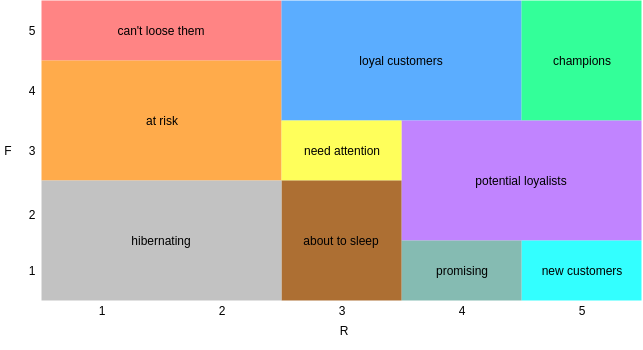

# 1. Can't Lose Them:
- Bu grupta 12 kişi vardır.
- Ortalama 136.33 gündür alışveriş yapmıyorlar.
- Ortalama 14.92 kez alışveriş yapmışlar.
- Ortalama 4150.68 Birim para kazandırmışlar.
### Alınabilecek Aksiyon Kararı :
Bu grup uzun zamandır alışveriş yapmıyor fakat toplam satın alma sayıları oldukça yüksektir. Yani firmadan alışveriş yapmaya meyilli bir gruptur. Sadece firma olarak kendimizi kısaca bir hatırlatmalıyız :) Bunun için, son yaptıkları alışverişlere bakılarak, kendilerini uzun zamandır aramızda görmediğimizi bildirmeli ve ilgilenebilecekleri ürünler üzerinden indirim kampanyaları düzenleyerek alışveriş yapmalarını sağlayabiliriz.

# 2. Need Attention
- Bu grupta 208 kişi vardır.
- Ortalama 50.93 gündür alışveriş yapmıyorlar.
- Ortalama 3.43 kez alışveriş yapmışlar
- Ortalama 1339.38 Birim para kazandırmışlar.
### Alınabilecek Aksiyon Kararı :
Bu grup hem zamansal olarak hem de toplam satın alma sayıları olarak ortalama değerler göstererek kaybetmeye meyilli olduğumuz, aynı zamanda da kazanmak için aşırı çaba gerektirmeyen müşteri grubudur. Hem satın alma sayılarını, hem de firmamızla temaslarını arttırmalıyız. "Loyal Customers" dediğimiz sadık müşterilerimize yakın bir gruptur. Kendilerini bu gruba çekmek için Frequency değerlerini arttırmalıyız, yani yukarıdaki görsele göre dikeyde bir hareket yaptırmalıyız Küçük meblağlı alışverişler dahi olsa toplam satın alma sayılarını arttırabilecek ve ilgilerini çekebilecek ürün tanıtımları veya promosyonlarla kendilerini sadık müşteri grubuna transfer edebiliriz.

# 3. New Customers
- Bu grupta 67 kişi vardır.
- Ortalama 6.09 gündür alışveriş yapmıyorlar.
- Ortalama 1 kez alışveriş yapmışlar
- Ortalama 348.64 birim para kazandırmışlar.
### Alınabilecek Aksiyon Kararı :
Bu müşteri grubu, son temasları taze olan gruplardır. Dolayısı ile bu grubun yukarıdaki görsele göre dikeyde hareket etmelerini sağlamalıyız. İlk önce "Potential Loyalists" grubuna, daha sonra da "Loyal Customers" grubuna dahil olmalarını sağlayacak 2 adım attırmalıyız. Bunun için toplam satın almalarını arttırmalıyız. Küçük meblağlarla dahi olsa bize sık sık gelmelerini sağlamalıyız. Yeni müşterilere özel kampanyalar düzenleyerek veya bir sonraki hafta veya ay gelecek olan ürün tanıtımlarını yaptıktan sonra, yeni müşterilere özel kampanyalarla harmanlayarak, toplam satın alma sayılarını arttırabiliriz.